In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("FullData.csv")
df.head(7)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10


In [27]:
df.columns.values

array(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date',
       'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Attacking_Position', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes'],
      dtype=object)

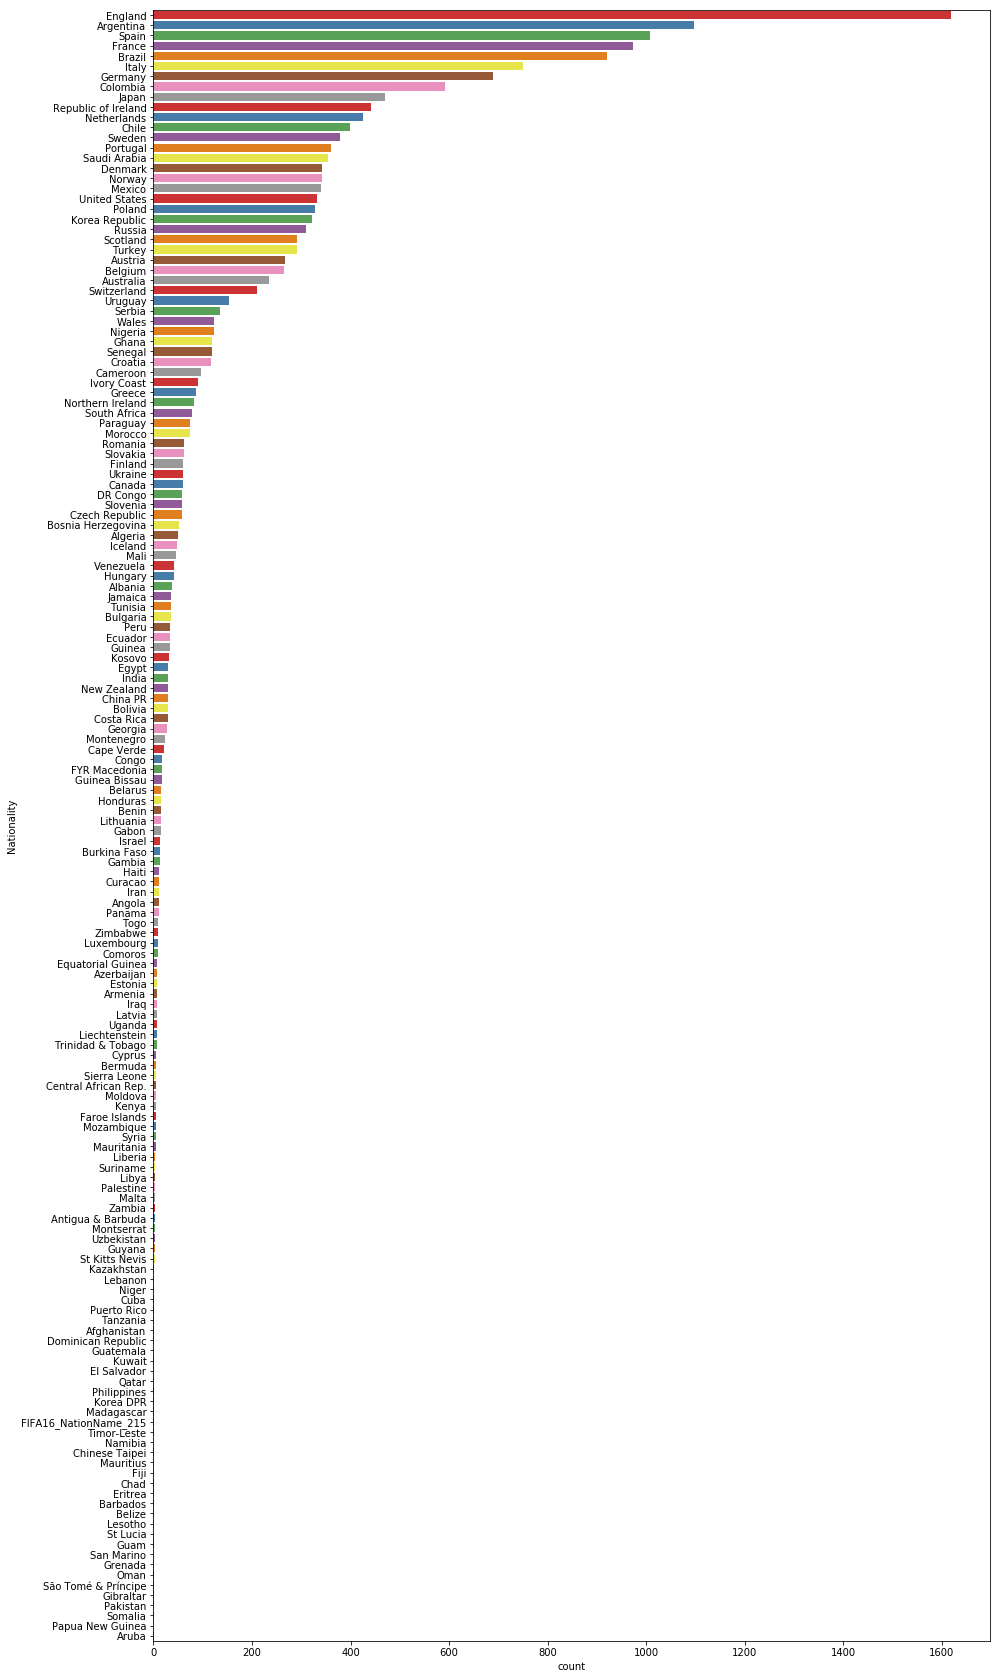

In [28]:
plt.figure(figsize=(15,30))
sns.countplot(y=df.Nationality,order = df['Nationality'].value_counts().index , palette="Set1") # Number of players from a nation in descending order

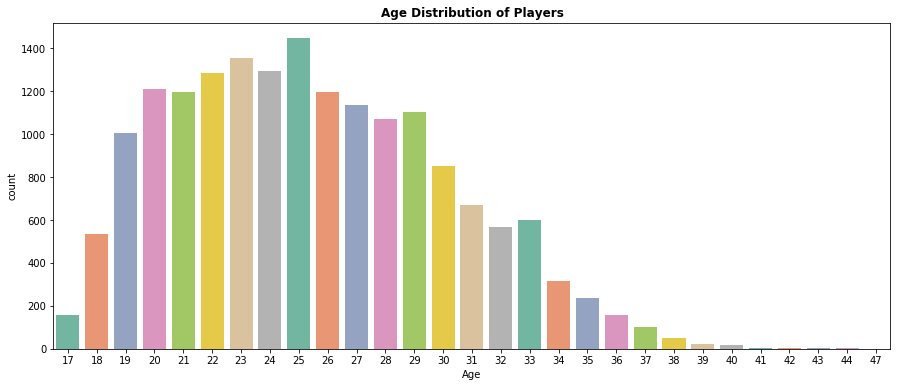

In [29]:
plt.figure(figsize=(15,6))
plt.title('Age Distribution of Players', weight='bold')
sns.countplot(x="Age",data = df,palette="Set2") #showing the most number of players are of 25 years of age

In [30]:
#weights
a = 0.5
b = 1
c= 2
d = 3
 
#GoalKeeping Characterstics
df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Speed + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)

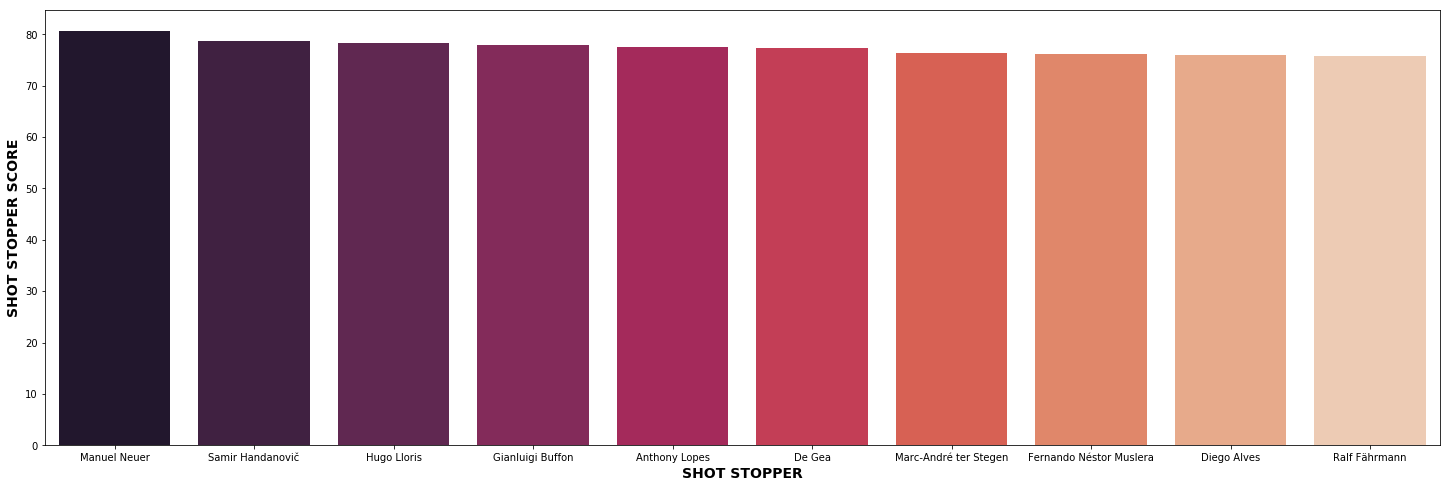

In [31]:
plt.figure(figsize=(25,8))
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper',ascending = False)[:10]
x1= np.array(sd.Name)
y1= np.array(sd.gk_Shot_Stopper)
plt.ylabel("SHOT STOPPER SCORE",  weight='bold').set_fontsize('14')
plt.xlabel("SHOT STOPPER",  weight='bold').set_fontsize('14')
sns.barplot(x1,y1,palette ="rocket")

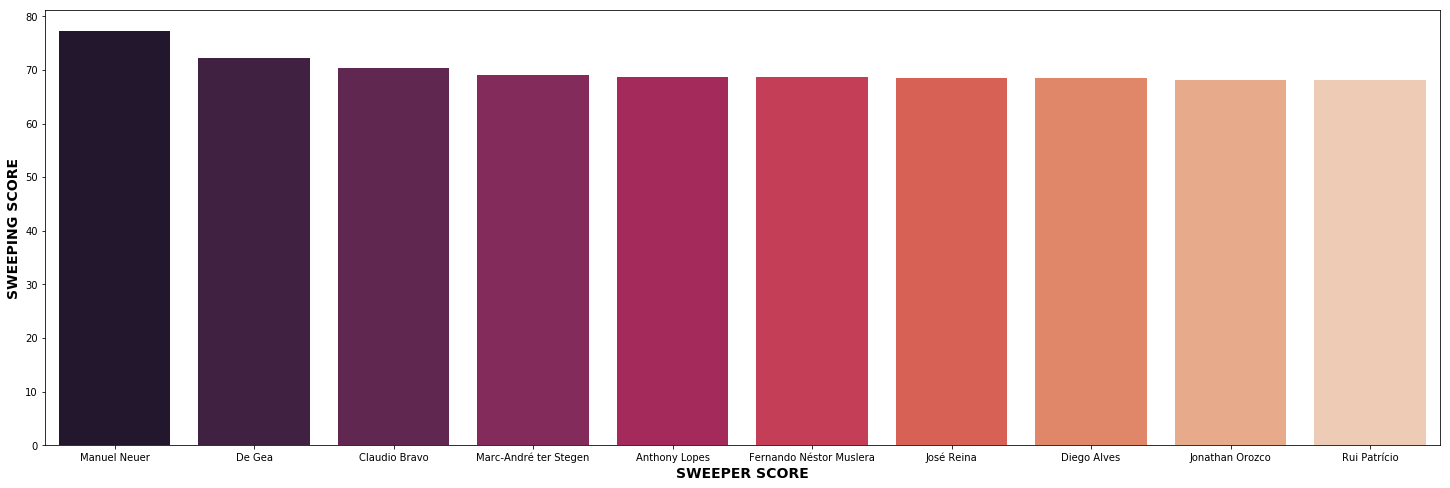

In [32]:
plt.figure(figsize=(25,8))
sd = df.sort_values('gk_Sweeper',ascending = False)[:10]
x2 = np.array(sd['Name'])
y2 = np.array(sd['gk_Sweeper'])
sns.barplot(x2,y2,palette = "rocket")
plt.ylabel("SWEEPING SCORE",  weight='bold').set_fontsize('14')
plt.xlabel("SWEEPER SCORE",  weight='bold').set_fontsize('14')

#We will pick Manuel Neuer as our goalkeeper

In [33]:
#Choosing Defenders
df['centre_backs'] = ( d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.Short_Pass + b*df.Long_Pass+ c*df.Acceleration + b*df.Speed
+ d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + b*df.Aggression)/(7*b + 2*c + 7*d)
df['wing_Backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + d*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 3*c + 5*d)


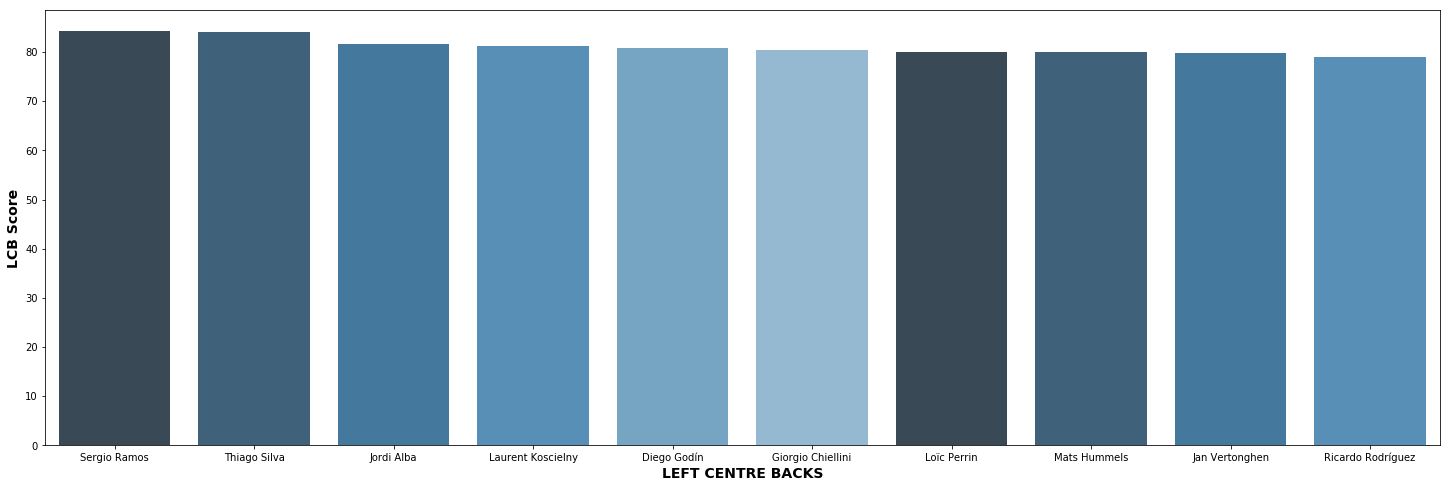

In [34]:
plt.figure(figsize=(25,8))
sd = df[(df['Club_Position'] == 'LCB')].sort_values('centre_backs', ascending=False)[:10]
x2 = np.array(sd['Name'])
y2 = np.array(sd['centre_backs'])
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score", weight='bold').set_fontsize('14')
plt.xlabel("LEFT CENTRE BACKS", weight='bold').set_fontsize('14')
#We will pick Ramos

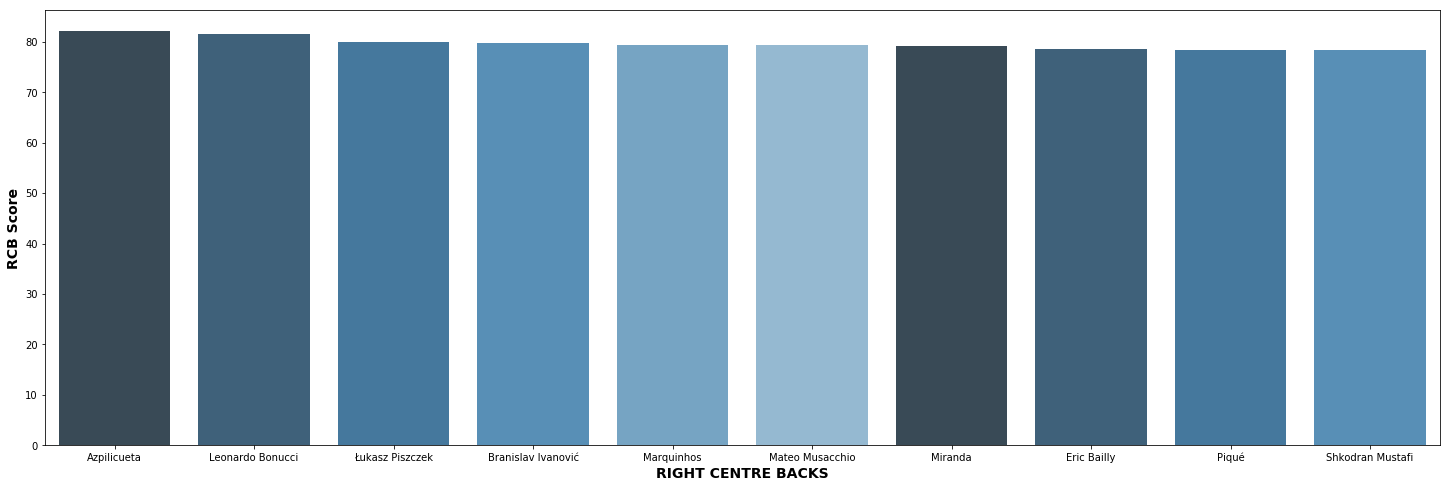

In [35]:
plt.figure(figsize =(25,8))
sd = df[(df['Club_Position'] == 'RCB')].sort_values('centre_backs', ascending = False)[:10]
x2 = np.array(sd['Name'])
y2 = np.array(sd['centre_backs'])
sns.barplot(x2,y2,palette = sns.color_palette("Blues_d"))
plt.ylabel("RCB Score", weight='bold').set_fontsize('14')
plt.xlabel("RIGHT CENTRE BACKS", weight='bold').set_fontsize('14')
#We will pick Azpilicueta

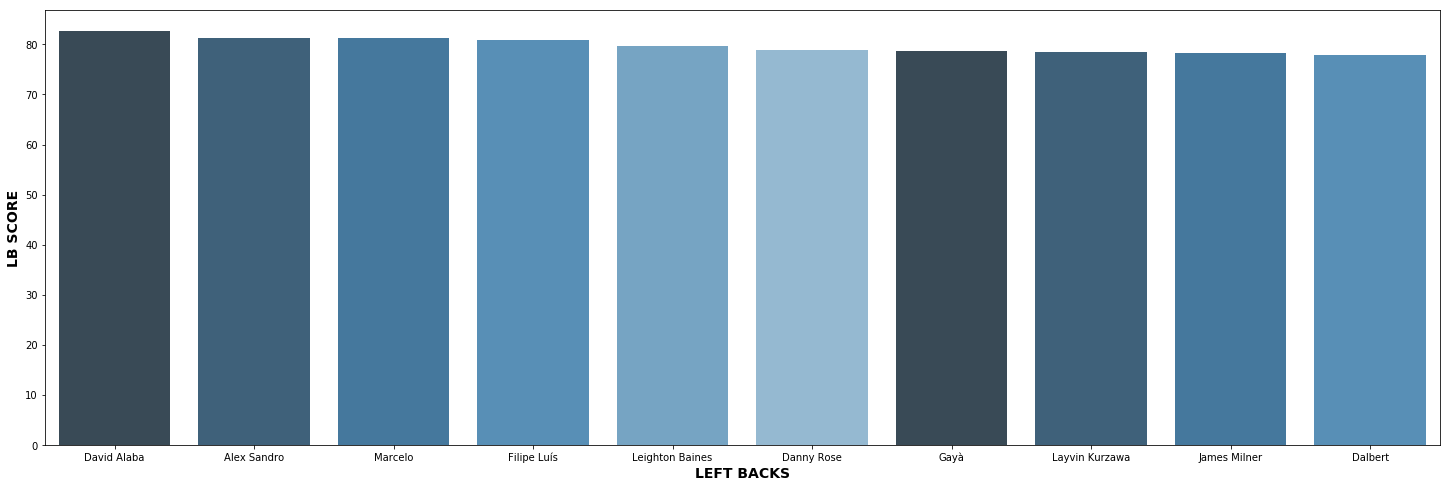

In [36]:
plt.figure(figsize=(25,8))
sd = df[(df['Club_Position']=='LWB')| (df['Club_Position']=='LB')].sort_values('wing_Backs',ascending = False)[:10]
x2 = np.array(sd['Name'])
y2 = np.array(sd['wing_Backs'])
sns.barplot(x2,y2,palette = sns.color_palette("Blues_d"))
plt.ylabel("LB SCORE", weight='bold').set_fontsize('14')
plt.xlabel("LEFT BACKS", weight='bold').set_fontsize('14')
#We will pick David Alaba

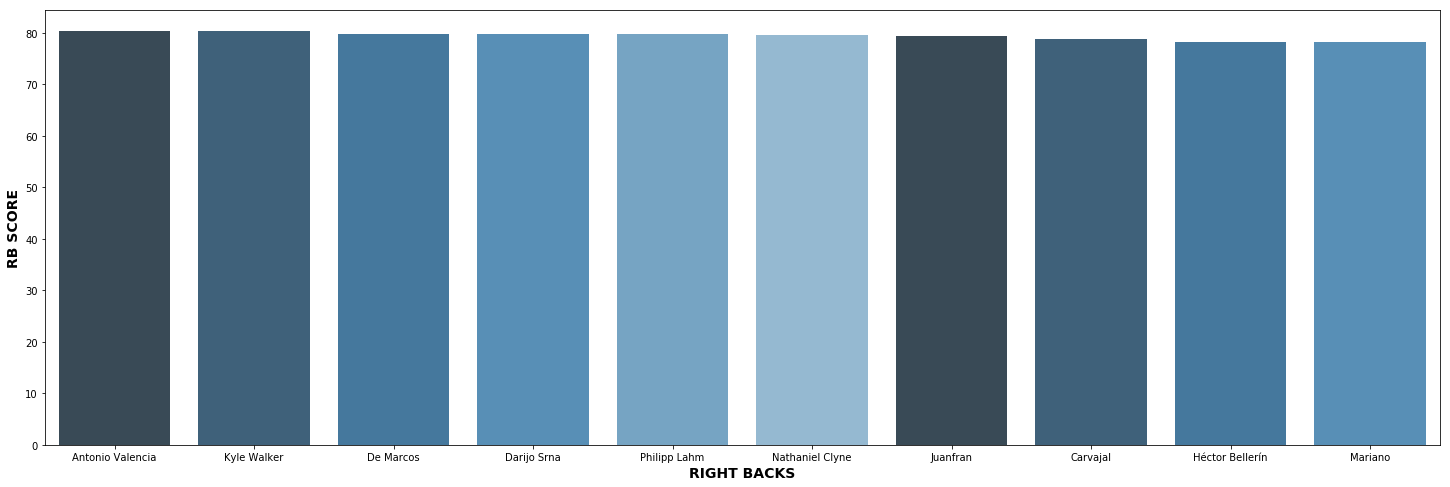

In [37]:
plt.figure(figsize=(25,8))
sd = df[(df['Club_Position']=='RWB' )| ( df['Club_Position']=='RB')].sort_values('wing_Backs',ascending = False)[:10]
x2 = np.array(sd['Name'])
y2 = np.array(sd['wing_Backs'])
sns.barplot(x2,y2,palette = sns.color_palette("Blues_d"))
plt.ylabel("RB SCORE", weight='bold').set_fontsize('14')
plt.xlabel("RIGHT BACKS", weight='bold').set_fontsize('14')
#We will pick Antonio Valencia

In [38]:
#Midfielding Indices
df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + c*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 5*c + 4*d)
df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + b*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + c*df.Marking + b*df.Standing_Tackle + d*df.Sliding_Tackle + d*df.Interceptions)/(0*a + 4*b + 5*c + 6*d)
df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)

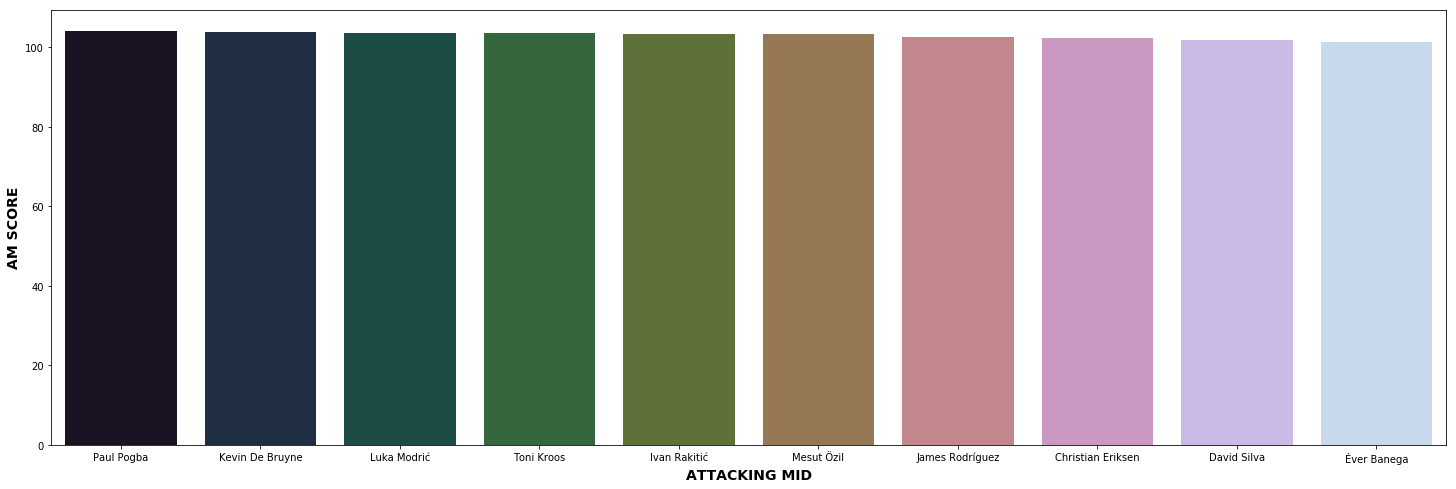

In [39]:
plt.figure(figsize=(25,8))
sd = df[(df['Club_Position']=='CAM' )| ( df['Club_Position']=='LCM')| ( df['Club_Position']=='RCM') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS')].sort_values('mf_playmaker',ascending = False)[:10]
x2 = np.array(sd['Name'])
y2 = np.array(sd['mf_playmaker'])
sns.barplot(x2,y2,palette = sns.color_palette("cubehelix", 11))
plt.ylabel("AM SCORE", weight='bold').set_fontsize('14')
plt.xlabel("ATTACKING MID", weight='bold').set_fontsize('14')
#We will pick Paul Pogba

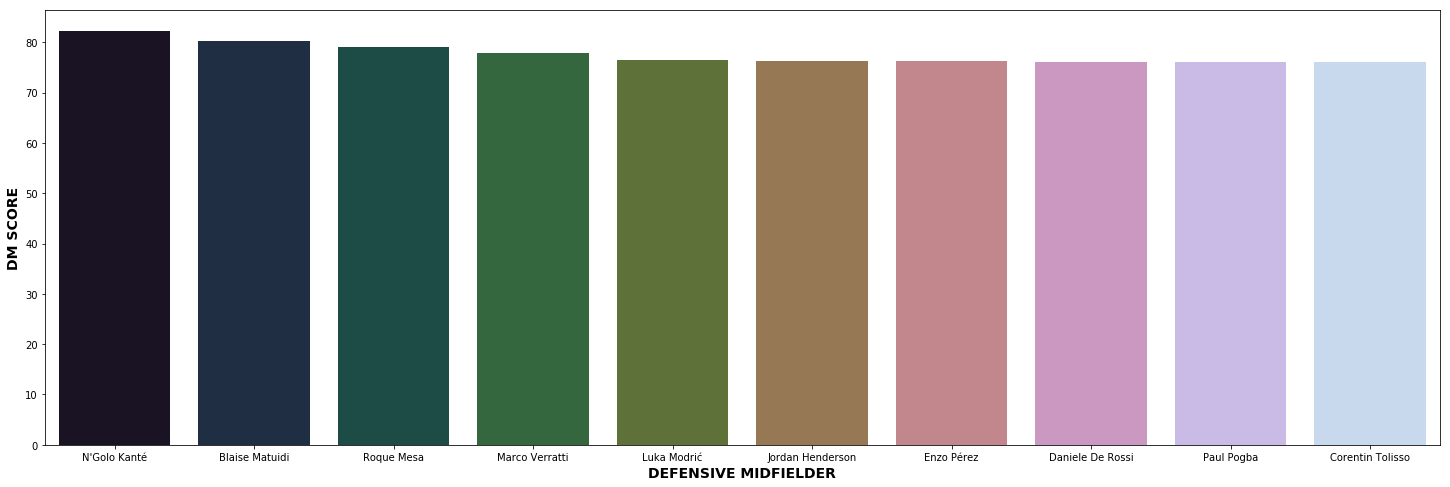

In [40]:
plt.figure(figsize=(25,8))
 
ss = df[(df['Club_Position'] == 'CM') | (df['Club_Position'] == 'CDM')| (df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'LCM')].sort_values('mf_beast', ascending=False)[:10]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.color_palette("cubehelix", 11))
plt.ylabel("DM SCORE", weight='bold').set_fontsize('14')
plt.xlabel("DEFENSIVE MIDFIELDER", weight='bold').set_fontsize('14')
#We will pick NGOLO KANTE

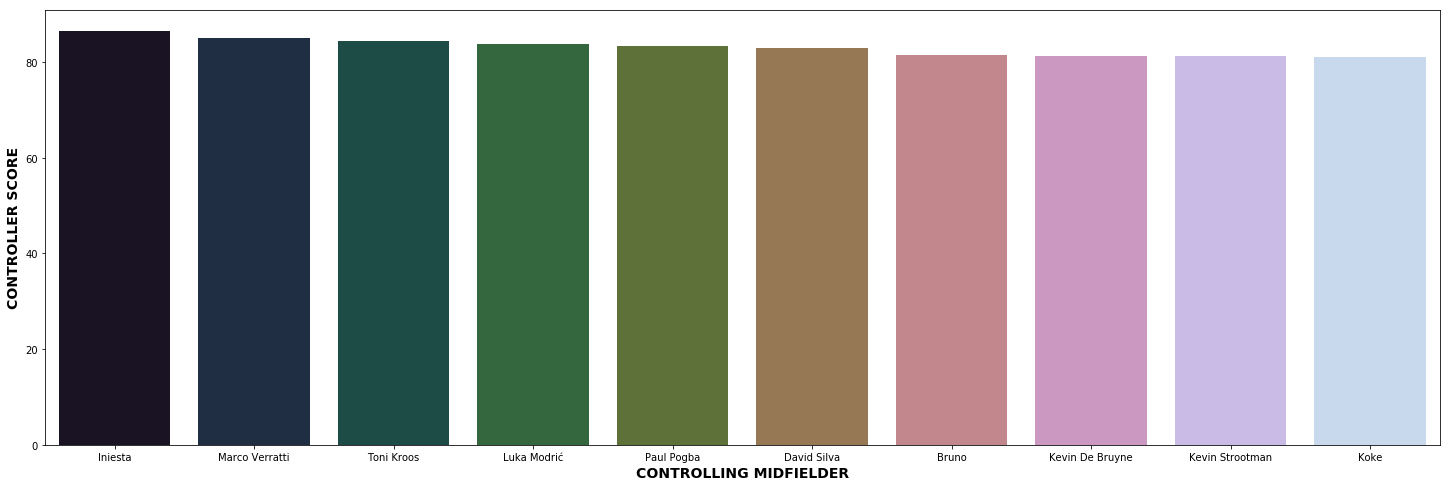

In [41]:
plt.figure(figsize=(25,8))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'LM')|(df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'RM')].sort_values('mf_controller', ascending=False)[:10]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.color_palette("cubehelix", 11))
plt.ylabel("CONTROLLER SCORE", weight='bold').set_fontsize('14')
plt.xlabel("CONTROLLING MIDFIELDER", weight='bold').set_fontsize('14')
#We will pick INIESTA

In [42]:
df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['striker'] = (b*df.Weak_foot + b*df.Ball_Control + b*df.Vision + b*df.Aggression + b*df.Agility + c*df.Curve + c*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + d*df.Jumping + d*df.Dribbling + d*df.Acceleration)/( 5*b + 2*c + 6*d)

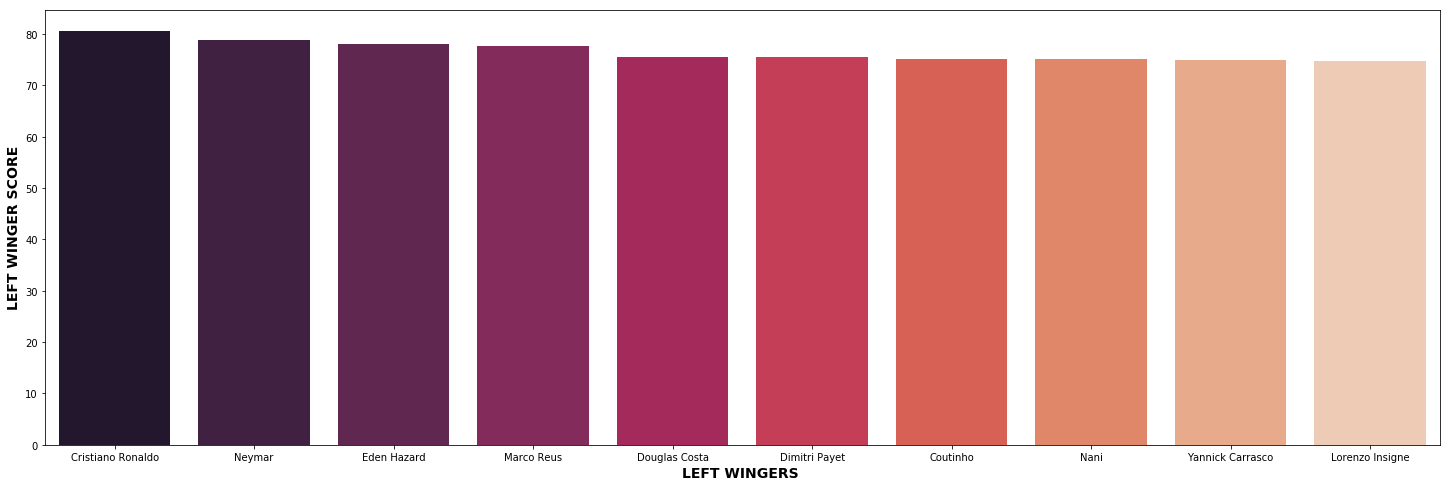

In [43]:
plt.figure(figsize=(25,8))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LW')].sort_values('att_left_wing', ascending=False)[:10]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette ="rocket")
plt.ylabel("LEFT WINGER SCORE", weight='bold').set_fontsize('14')
plt.xlabel("LEFT WINGERS ", weight='bold').set_fontsize('14')
#We will pick RONALDO

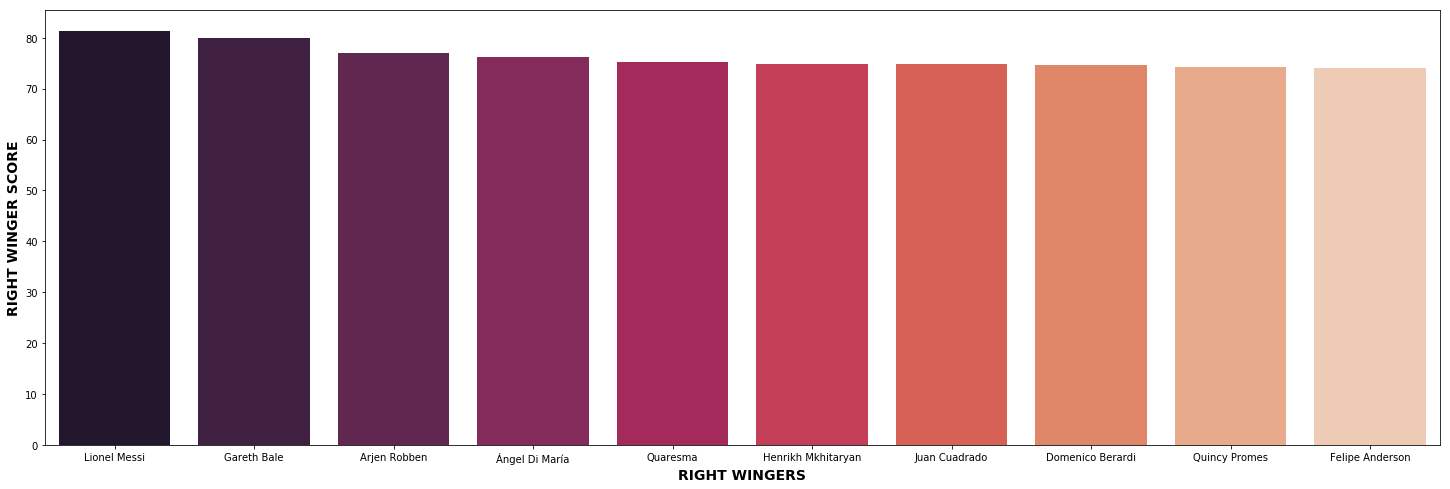

In [44]:
plt.figure(figsize=(25,8))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RW')].sort_values('att_left_wing', ascending=False)[:10]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette ="rocket")
plt.ylabel("RIGHT WINGER SCORE", weight='bold').set_fontsize('14')
plt.xlabel("RIGHT WINGERS", weight='bold').set_fontsize('14')
#We will pick MESSI

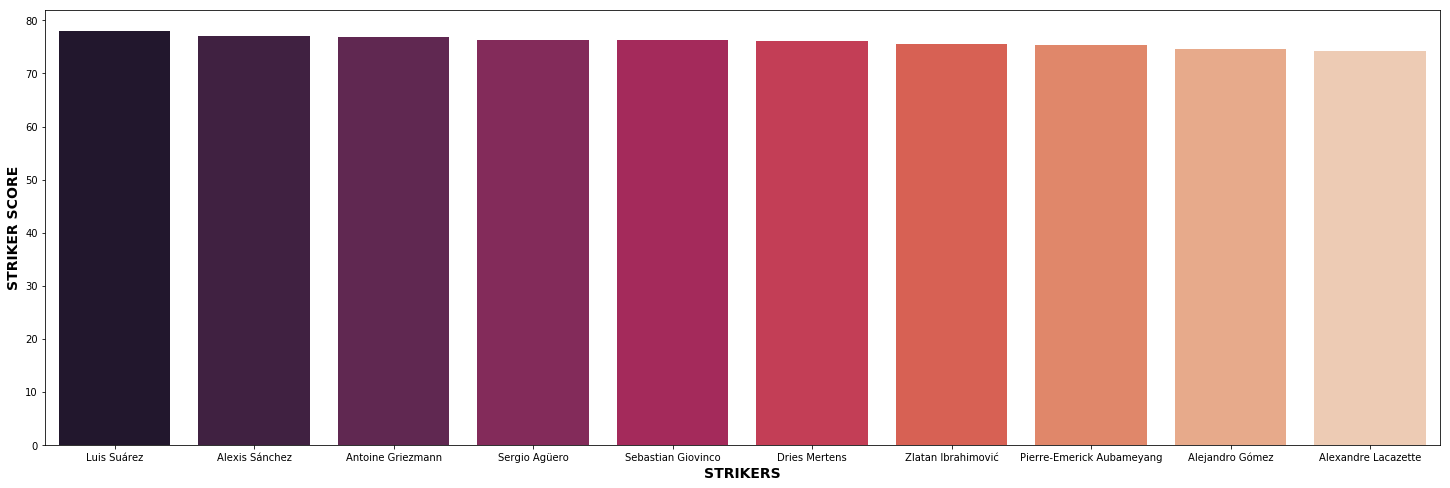

In [45]:
plt.figure(figsize=(25,8))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'LS')| (df['Club_Position'] == 'RS')| (df['Club_Position'] == 'CF')].sort_values('att_left_wing', ascending=False)[:10]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette ="rocket")
plt.ylabel("STRIKER SCORE", weight='bold').set_fontsize('14')
plt.xlabel("STRIKERS", weight='bold').set_fontsize('14')
#We will pick SUAREZ

In [51]:
from IPython.display import Image



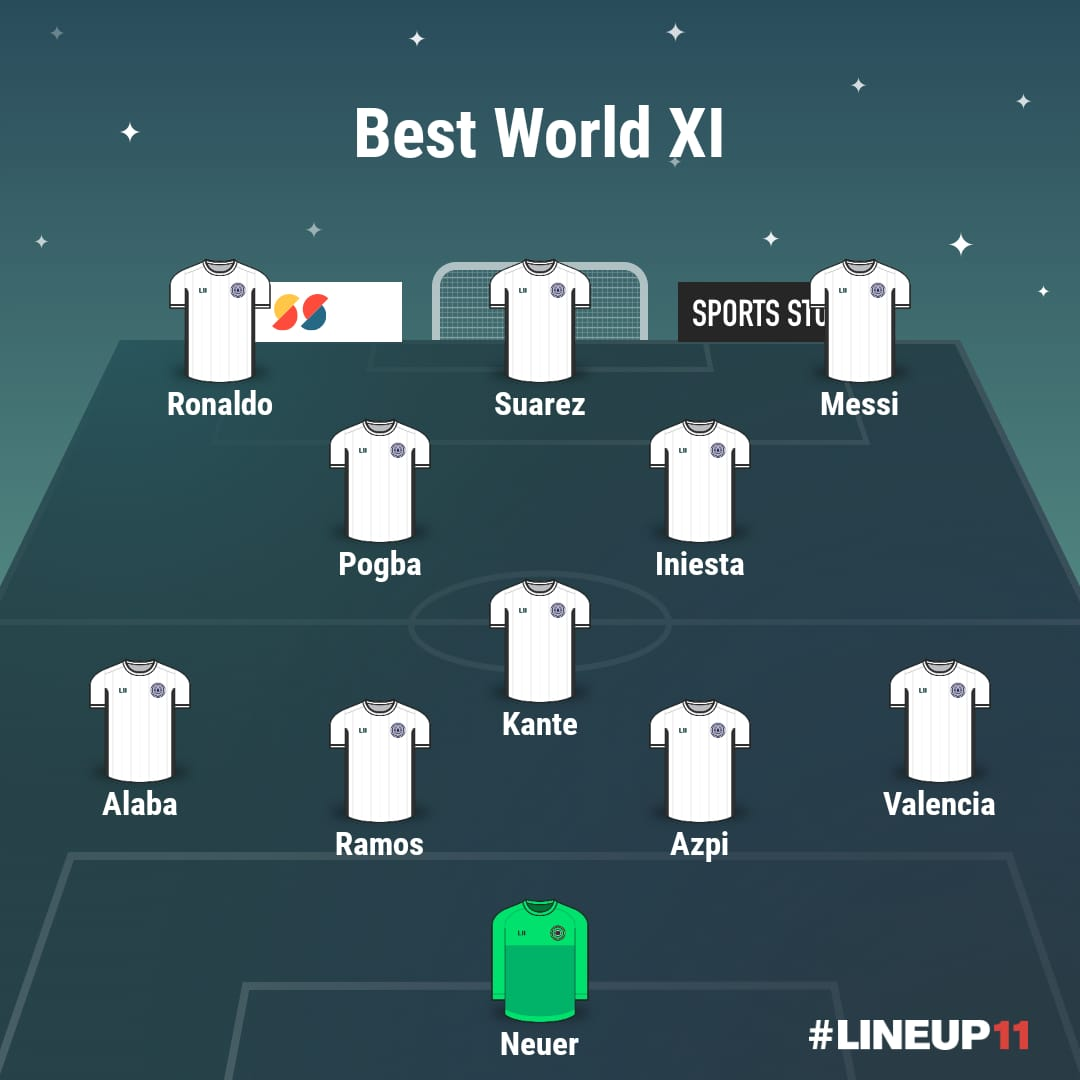

In [52]:
Image(filename='WORLD-XI.jpeg') 